# Numerical Methods
## Lecture 3: Minimization
by: [Tomasz Romańczukiewicz](mailto:trom@th.if.uj.edu.pl)<br>
    web: [th.if.uj.edu.pl/~trom/](th.if.uj.edu.pl/~trom/)<br>
    rm B-2-03<br>

*********************************************************

### Outline

Basically there three types of minimization techniques:
1. bracketing methods (more stable, but usually 1-dim),
1. iterative (faster), 
1. stochastic method (slow but can find global minimum)

In principle if $f(x)=0$ for $x=x_*$ than $g(x)=[f(x)]^2$ has a minimum at $x_*$.<br>
So it may seem that finding root of $f(x)$ is equivalenT to finding minimum of $g(x)$.
Analytically it might be true but numerically they are different procedures.
* minimum of $g(x)$ may never give $g(x_*)=0$ and it is diff to tell if $x_*$ is a zero of $f$ or not<br>
* better if we search for $f=f_{min}$ but we know $f'(x)$, finding roots is  more precise
* functions are very flat around minima, precise $x_{min}$ more difficult to find that $f_{min}$<br>
especially when $|f_{min}|\gg1$. 
* however in more dimensions it mIght be easier to find minimum of $F(\vec x)$ than a solution of 
$\displaystyle \frac{\partial F}{\partial\vec x}=0$



### Bracketing methods
All methods start  with points satisfying the relations:
$$a<b<c \;\; f(a)>f(b) \;\wedge \;f(b)<f(a)$$
Then we may expect (if the function is regular enough - continouous $f$ and $f'$) that $f$ has a minimum between $(a, c)$<br>
If we don't know such three points we search for them:
* take two points and choose the third down-hill
* choose next point increasing the distance (for example twice) but shorter than some maximal step
* reapeat until success

#### Ternary search
If we have three points bracketing the minimum we can use some interval divisions to localize the minimum<br>
Interval $[a, c]$ can be devided into three intervals (equal - ternary search or not eg. golden ratio)
<div class="alert alert-block alert-success">
<b>Example:</b> 
    $$f(x) = \frac{1-2x}{2x+10}e^{-x}$$
</div>

In [172]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

def f(x):
    return np.exp(-x)*(1-2*x)/(2*x+10)

In [170]:
def show_minimization_steps(F, x1, x2, step=0, plot=True, prnt=False):
    """
        Function not optimized
        used only for presentation purposes
    """
    pl.figure(figsize=(6,3), dpi=150)
    x = np.linspace(x1, x2, 1000)
    y = F(x)    

    X = np.linspace(x1, x2, 4)
    Y = F(X)
    for n in range(step):
        if Y[1]<Y[2]: x1, x2 = X[0], X[2]
        else: x1, x2 = X[1], X[3]
        X = np.linspace(x1, x2, 4)
        Y = F(X)       
        if(prnt==True):  print("step :", n, X)
    if(plot==True): 
        pl.grid(True)
        pl.plot(x, y)    
        pl.plot(X, Y, 'o')
        pl.show()        

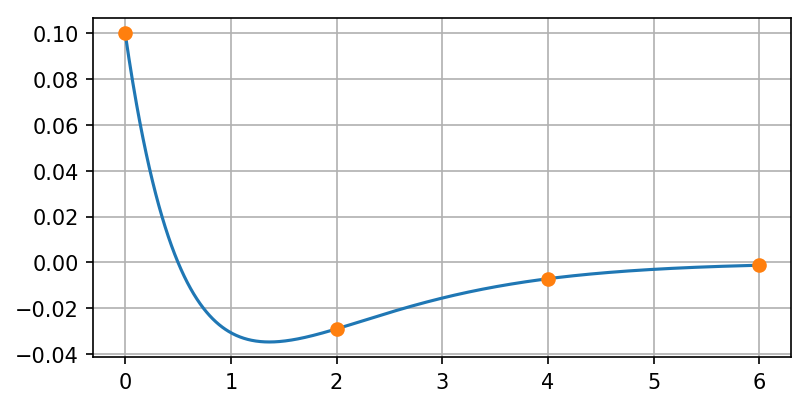

In [171]:
show_minimization_steps(f, 0, 6, 0)

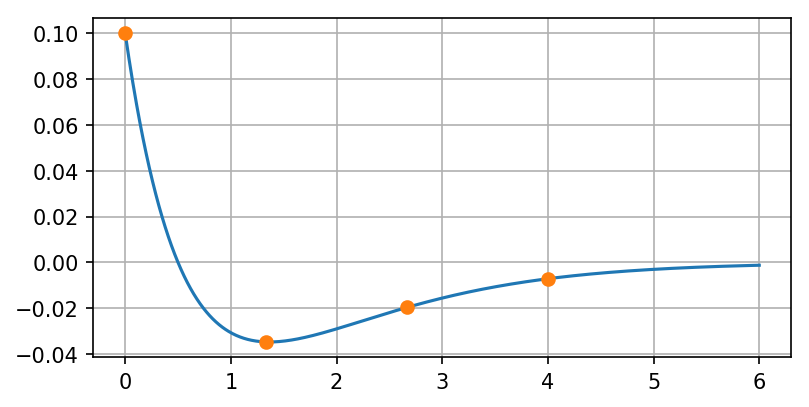

In [160]:
show_minimization_steps(f, 0, 6, 1)

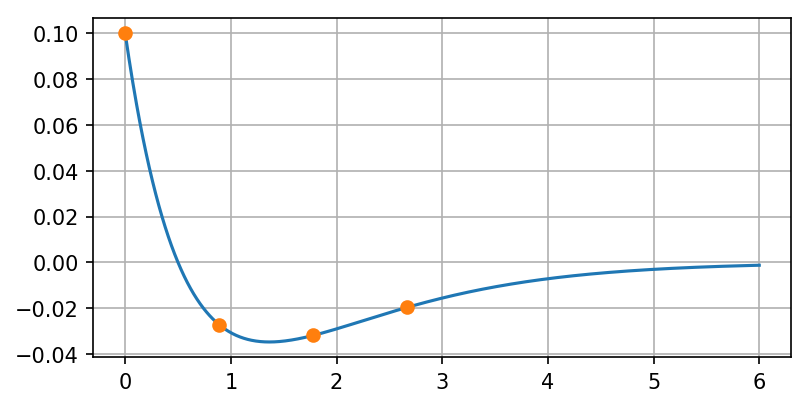

In [161]:
show_minimization_steps(f, 0, 6, 2)

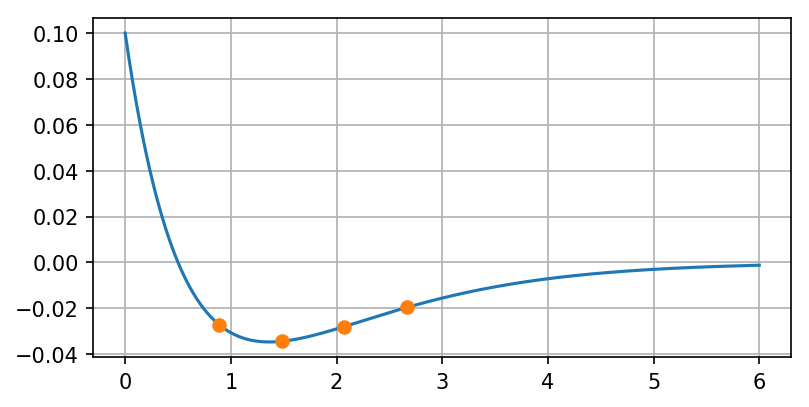

In [162]:
show_minimization_steps(f, 0, 6, 3)

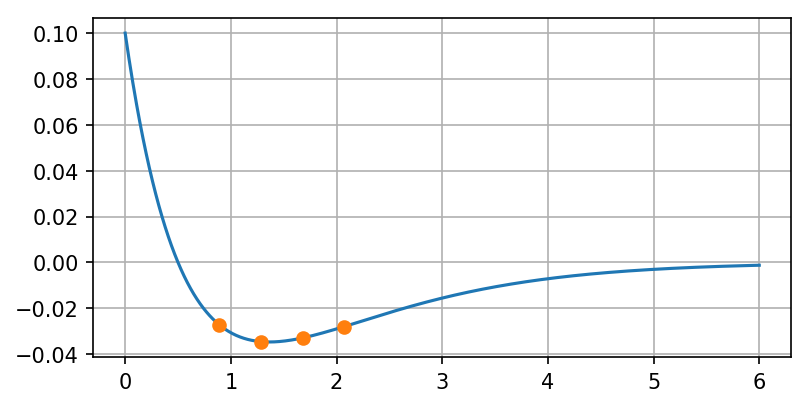

In [163]:
show_minimization_steps(f, 0, 6, 4)

In [165]:
show_minimization_steps(f, 0, 6, 10, plot=False, prnt=True)

step : 0 [0.         1.33333333 2.66666667 4.        ]
step : 1 [0.         0.88888889 1.77777778 2.66666667]
step : 2 [0.88888889 1.48148148 2.07407407 2.66666667]
step : 3 [0.88888889 1.28395062 1.67901235 2.07407407]
step : 4 [0.88888889 1.15226337 1.41563786 1.67901235]
step : 5 [1.15226337 1.32784636 1.50342936 1.67901235]
step : 6 [1.15226337 1.2693187  1.38637403 1.50342936]
step : 7 [1.2693187  1.34735559 1.42539247 1.50342936]
step : 8 [1.2693187  1.32134329 1.37336788 1.42539247]
step : 9 [1.32134329 1.35602635 1.39070941 1.42539247]


Each iteration uses new middle points. Very inneficient.<br>

In each iteration we reduce the segment to $2/3$ for the cost of at two calculations of $f(x)$

Perhaps we could use three points from the previous iteration and calculate  𝑓(𝑥) only once

But where to put the fourth point?



<b>Best strategy:</b> devide an interval into three in such a way that each two would have the length $\tau$ times the length of a large one.

$$|\;\; a\;\; |\;b\;|\;\; a\;\; |$$

$$a+b=(2a+b)\tau \;\wedge\; a=(a+b)\tau$$

$$\tau^2+\tau-1=0\;\;\Rightarrow\;\; \tau=\frac{\sqrt{5}-1}{2}=0.61803398875$$

_Golden ratio_ minimizes number of steps on average (larger vs smaller segment)<br>

We converge as $\tau^n$ (linear converngence) with $n$ calculations of $f$<br>
Slower than bisection $(1/2)^n$ but faster than ternary search<br>

Slighly better but far more complicated algorithm: Fibbonacci search<br>
The legths of the intervals (from smaller to largest) form a Fibbonacci series<br>

$$\lim_{n\to\infty}\frac{F_{n}}{F_{n+1}}=\tau$$

How accurate we can find $x_{min}$.<br>
Around the minimum usually:
$$f(x)=f(x_{min})+\frac12f''(x_{min})(x-x_{min})^2$$
But $f$ can be calulated with an error $f\pm\epsilon|f|$ which limits the precision of $x_{min}$ to
<div class="alert alert-block alert-danger">
    $$|x-x_{min}|=\sqrt{\epsilon}\sqrt{\frac{2|f(x_{min})|}{|f''(x_{min})|}}$$
    
Using 64-bit floats we obtain 32-bit position of the minimum.
</div>


In [193]:
def plot_accuracy_comparision():
    pl.figure(figsize=(10,3), dpi=150)
    x = np.linspace(0, 6, 1000)
    y1 = np.float16(1 + 0.001*(x-2)**2-2e-4*(x-2.5)**3)
    y2 = np.float16(0.002*(x-2)-6e-4*(x-2.5)**2)
    pl.subplot(1, 2, 1)
    pl.grid(True)
    
    pl.title('Minimum')
    pl.plot(x, y1)
    pl.legend(['f(x)'])
    pl.subplot(1, 2, 2)
    pl.grid(True)
    pl.title('zero')
    pl.plot(x, y2, 'red')
    pl.legend(["f'(x)"])
    pl.show()

### Comparision of accuracy between minimization and root search
Expected:

Accuracy of minimum:  0.49410588440130926


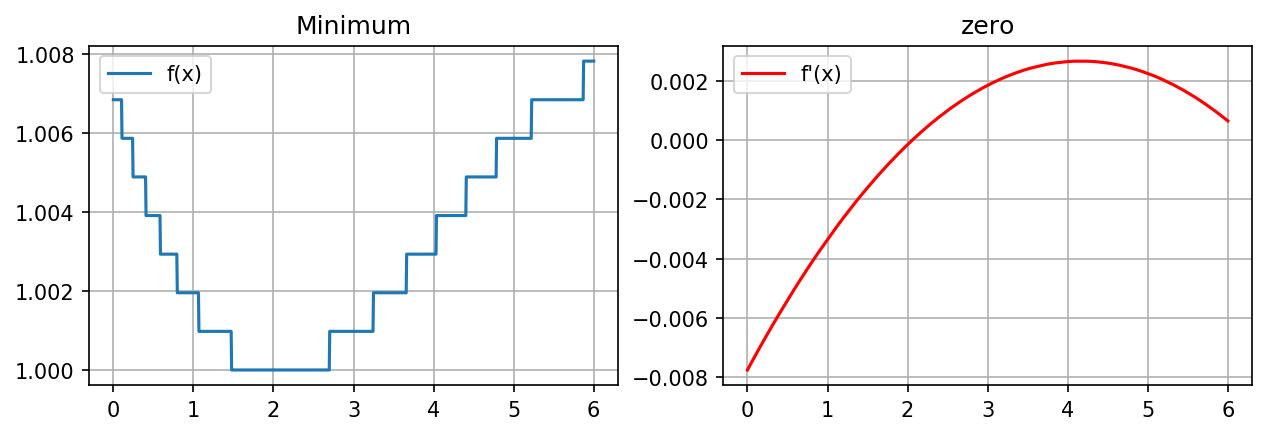

In [194]:
ε = 2**(-11)  # 11 bits out of 16 used for mantissa
print("Accuracy of minimum: ", np.sqrt(ε*1/0.002))
plot_accuracy_comparision()

#### Parabola method
* Through given non-colinear three points $a, b, c$ we can draw a parabola.<br>
* Vertex of the parabola 

$$d=b-\frac12\frac{(b-a)^2[f(b)-f(c)]-(b-c)^2[f(b)-f(a)]}
{(b-a)[f(b)-f(c)]-(b-c)[f(b)-f(a)]}$$

should approximate a minimum of $f(x)$ if we are close enough to the minimum.<br>
* Now there are four points $(a', b', c', d')$ (sorted $\{a,b,c,d\}$) limiting three intervals<br>
* if $f(b')>f(c')$ for next iteration we choose $(b', c', d')$
* if $f(b')<f(c')$ for next iteration we choose $(a', b', c')$





In [11]:
def plot_parabola_method(f, a, b, c, step):
    """
        Function not optimized
        used only for presentation purposes
    """
    pl.figure(figsize=(6,3), dpi=150)
    x = np.linspace(0, 6, 1000)    
    X = np.array([a, b, c])
    parabola = (x-b)*(x-c)*f(a)/(a-b)/(a-c) + (x-a)*(x-c)*f(b)/(b-a)/(b-c) + (x-b)*(x-a)*f(c)/(c-b)/(c-a)
    for n in range(step):
        length = c-a
        parabola = (x-b)*(x-c)*f(a)/(a-b)/(a-c) + (x-a)*(x-c)*f(b)/(b-a)/(b-c) + (x-b)*(x-a)*f(c)/(c-b)/(c-a)
        d = b - 0.5 * ((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)) ) / \
                      ((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)) )
        X = np.array([a, b, c, d])
        X.sort()
        F = f(X)
        if F[1]<F[2]: a, b, c = X[0], X[1], X[2]
        else: a, b, c = X[1], X[2], X[3]    
            
        #print(X, " ", d, f(d))

    pl.plot(x, f(x), 'black')
    pl.ylim([-0.08,0.1])
   

    pl.plot(x, parabola, linestyle='dashed')
    pl.grid(True)
    pl.plot(X,f(X), 'o', ms=3)
    
    pl.show()

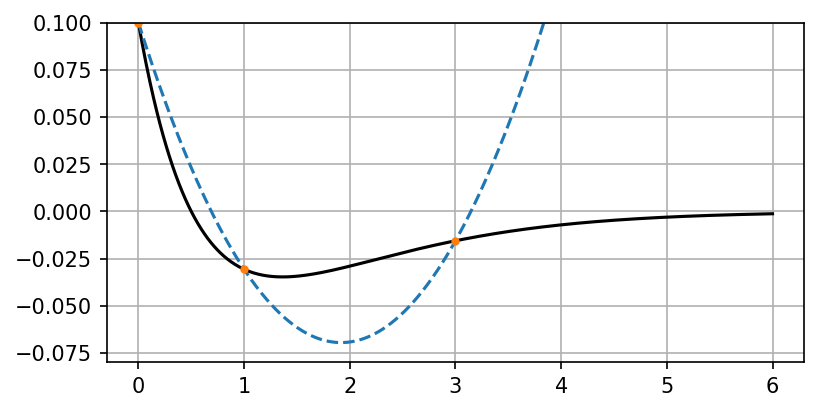

In [12]:
plot_parabola_method(f, 0, 1, 3, 0)

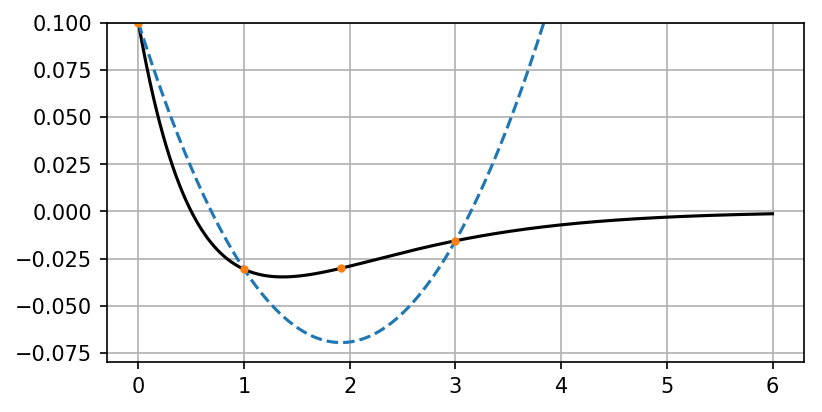

In [13]:
plot_parabola_method(f, 0, 1, 3, 1)

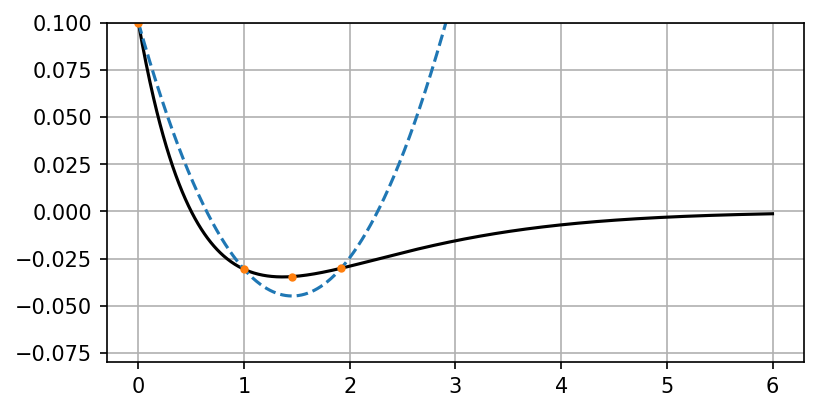

In [14]:
plot_parabola_method(f, 0, 1, 3, 2)

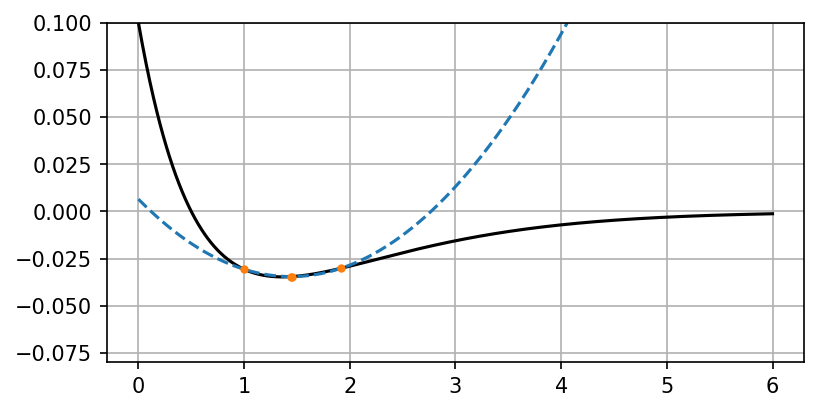

In [15]:
plot_parabola_method(f, 0, 1, 3, 3)

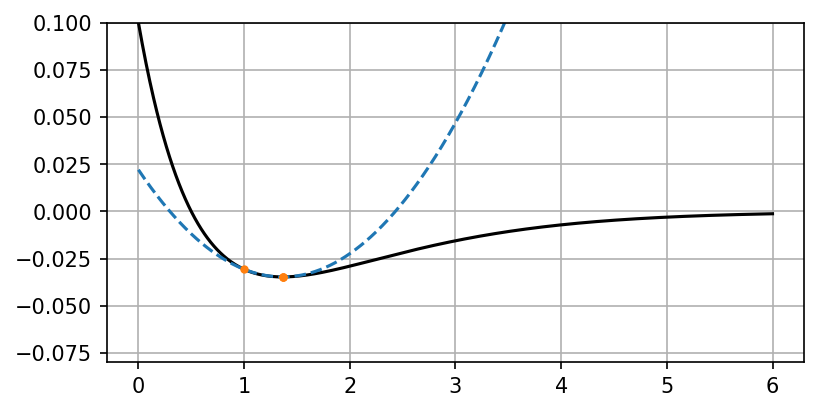

In [16]:
plot_parabola_method(f, 0, 1, 3, 10)

* Better (superlinear) convergence than gOlden ratio $\epsilon_n\sim n^{-1.325}$
* But it can stuck ($d\approx c$), than other division(bisection) is used.
* It can be unstable if the function is very different from parabola
* Brent added new steps:
    - if $d\neq (a,c)$ 
    - or new segment would be larger then _half_ of the current segment length
    then bisect: $d=\frac12(a+c)$ and proceed with the standard choice of the new segment

In [195]:
def plot_brent_method(f, a, b, c, step):
    """
        Function not optimized
        used only for presentation purposes
    """
    pl.figure(figsize=(6,3), dpi=150)
    x = np.linspace(0, 6, 1000)    
    X = np.array([a, b, c])
    parabola = (x-b)*(x-c)*f(a)/(a-b)/(a-c) + (x-a)*(x-c)*f(b)/(b-a)/(b-c) + (x-b)*(x-a)*f(c)/(c-b)/(c-a)
    bisect = False
    for n in range(step):
        length = c-a
        XXX = (a, b, c)
        bisect = False
        parabola = (x-b)*(x-c)*f(a)/(a-b)/(a-c) + (x-a)*(x-c)*f(b)/(b-a)/(b-c) + (x-b)*(x-a)*f(c)/(c-b)/(c-a)
        d = b - 0.5 * ((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)) ) / \
                      ((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)) )
        if d<a or d>c: 
            # print("Bisection outside")
            d=0.5*(a+c)
            bisect = True
        X = np.array([a, b, c, d])
        X.sort()
        F = f(X)
        if F[1]<F[2]: a, b, c = X[0], X[1], X[2]
        else: a, b, c = X[1], X[2], X[3]
        
        if c-a>0.5*length: 
            a, b, c = XXX
            d=0.5*(a+c)
            X = np.array([a, b, c, d])
            X.sort()
            F = f(X)
            bisect = True
            #  print("Bisection length")
            if F[1]<F[2]: a, b, c = X[0], X[1], X[2]
            else: a, b, c = X[1], X[2], X[3]
            
        #print(X, " ", d, f(d))

    pl.plot(x, f(x), 'black')
    pl.ylim([-0.08,0.1])
    if bisect==True: pl.text(4, 0.06, "Bisection")
    pl.plot(x, parabola, linestyle='dashed')
    pl.grid(True)
    pl.plot(X,f(X), 'o', ms=3)
    
    pl.show()

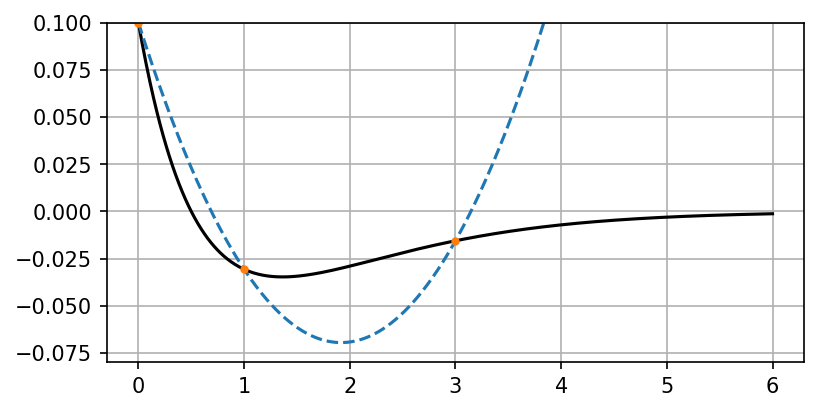

In [18]:
plot_brent_method(f, 0, 1, 3, 0)

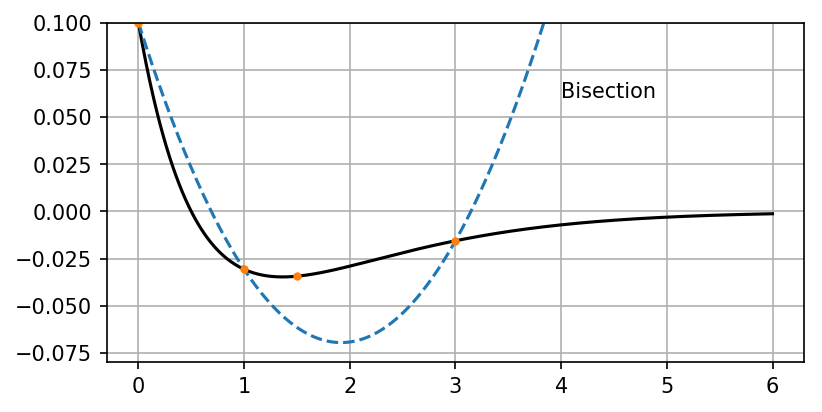

In [19]:
 plot_brent_method(f, 0, 1, 3, 1)

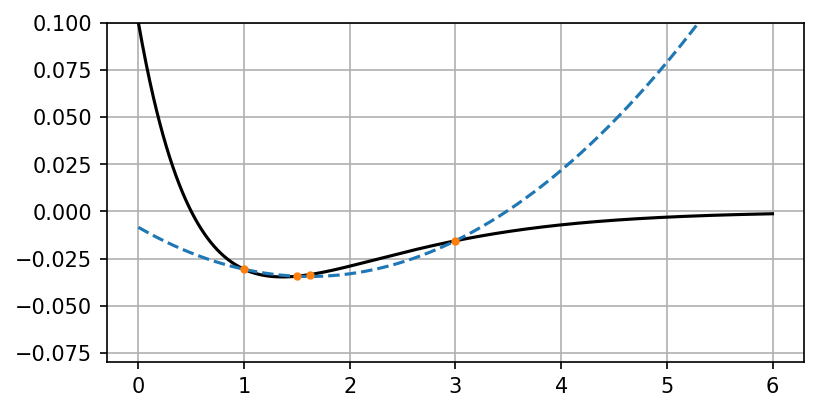

In [20]:
 plot_brent_method(f, 0, 1, 3, 2)

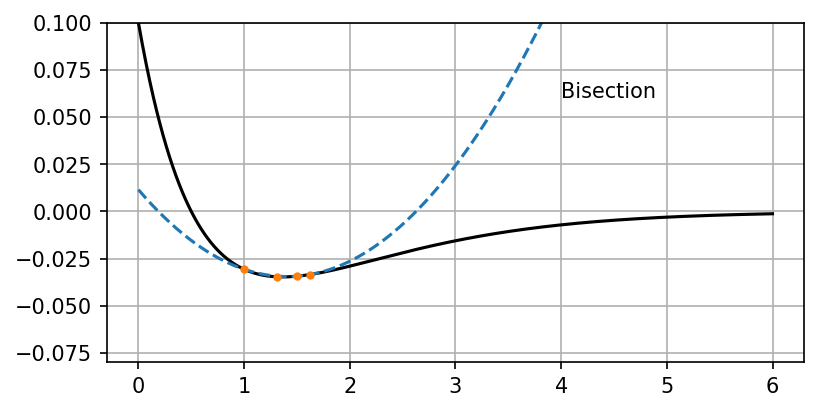

In [21]:
 plot_brent_method(f, 0, 1, 3, 3)

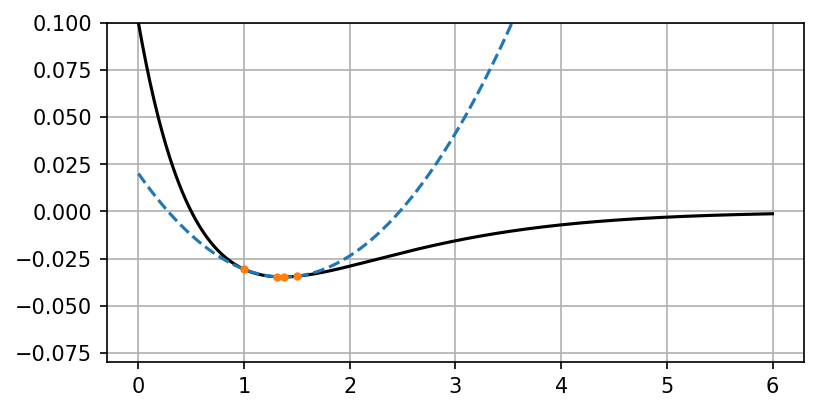

In [22]:
 plot_brent_method(f, 0, 1, 3, 4)

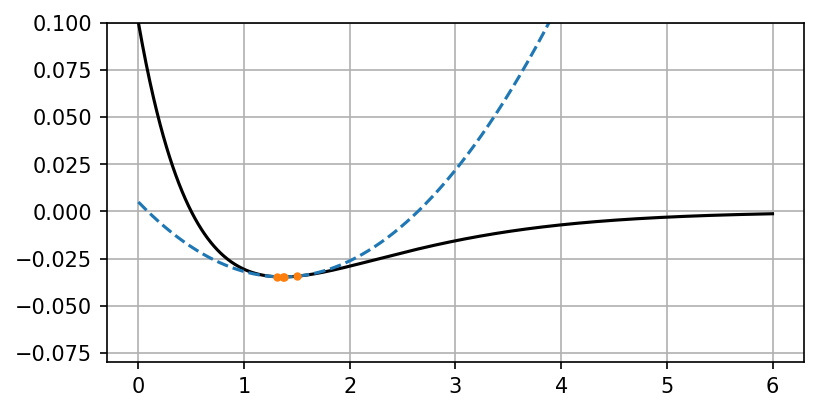

In [23]:
 plot_brent_method(f, 0, 1, 3, 5)

#### Methods uising derivatives

Knowing the derivative of $f(x)$ allows to find a zero of $f'(x)$ which might be slightly more difficult but can be done more precisely

### Global minimization
#### Stochastioc algorithms
Many stochastic algorithms are based on natural procesess:
- simulated annealing
- bee swarm 
- ant colony
- genetic algorithms
- differential evolultion
* simplex (ameba) algorithm 

<b>Simulated annealing</b> reproduces a physical process of heating a body followed by slow cooling down often used in metalurgy.
* High temeratures allows the system to become anisotropic and probe many different states. 
* Cooling decreases the energy (test function) and allows to relax at minimum.
* Non-zero temperature allows to _jump_ outside the current (most likely) local minimum.
* The deeper the local minimum the more difficult it is to jump out of it.
* Jump probability decreases with the temprature drop
* Finally the lowest energy state is found (in metalurgy: example uniform cristal)


Algorithm (details may vary):
* randomly choose initial point $x$
* randomly choose neighbour $y$ ($|x-y|$ can be proportional to temperature $T$, in physics gaussian distro)
* if $f(y)<f(x)$ we accept $y$ as a new solution
* if $f(y)>f(x)$ we accept $y$ as a new solution with probability $P(f(y)-f(x), T)$
  in physics $P$ has a Boltzman distribution
  
  $$P(\Delta E, T) = e^{-\beta \Delta E/T}$$
* decrease the temperature example $T_n = (n_{max}-n)T_0$

<b>Differential evolution</b> from a set of agents (test solutions) in each iteration we create a new set by _mutating_ the values. In 1-dim:
* choose randomly $N$ agents $x_i$, $i=0\ldots N-1$
* until finish:
    - for each $x$ choose three agents $a, b$ and $c$
    - calculate $y=a+F\cdot(b-c)$, $F\in[0,2]$ is a differential weight 9usually constant)
    - if $f(y)\leq f(x)$ then $x$ is replaced by $y$
* the result is an agent with the lowest $f(x)$

In higher dimensions we also choose which coordinates are mutated with _cross over_ probability

In [197]:
def f(x):
    return 4*np.sin(0.5*x**2)+np.cos(10/(x**2+0.5))*(x-5)**2

def show_current_function(X, G, x, g, position, step):
    pl.subplot(3, 2, position)
    pl.plot(X, G, 'black')
    pl.grid(True) 
    pl.plot(x, g, "o", color='orange', ms=5)
    pl.text(1.2, 22, "step {:d}\nmin={:.6f}".format(step, np.amin(g)))

In [198]:
def diff_evolution_example():
    x1, x2, N = -3, 3, 10
    pl.figure(figsize=(12,7), dpi=120)
    # initial random choice
    x = x1 + (x2-x1)*np.random.rand(N)
    g = f(x)
    show_current_function(X, G, x, g, 1, 0)
    F = 0.2  # wieght
    for step in range(10):
        for n in range(N):            
            (a,b,c) = np.random.choice(x, 3)
            y = a + F*(b-c)
            gy = f(y)
            if gy<g[n] and x1<y<x2 :
                x[n], g[n] = y, gy
        if step%2==0:
            show_current_function(X, G, x, g, 2+step/2, step+1)
    pl.show()

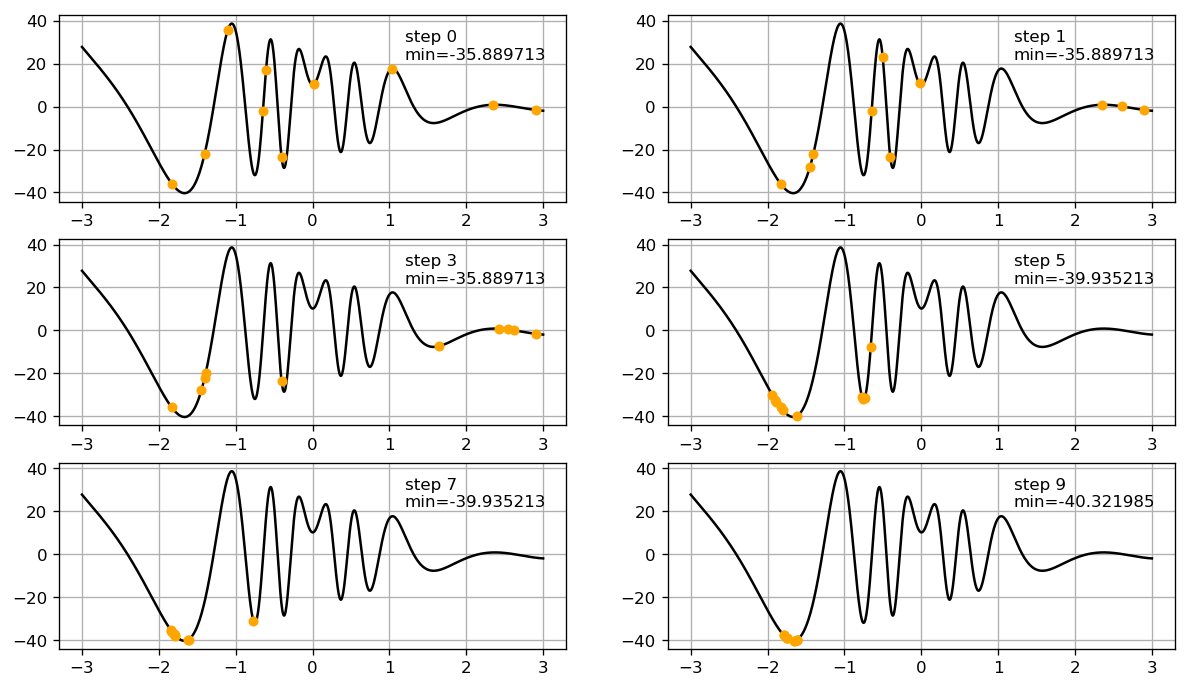

In [142]:
diff_evolution_example()

* This algorithm shows its strength in higher dimensions, where we also choose which directions are updated. 
* It quickly localizes the global minimum with some approximation
* Stochastic methods usually converge slower
* It might happen that agents _cluster_ <br>
    small differences don't allow proper sampling (in biology it is bad if all individuals have similar DNA)


## Tasks:
1. Implement golden ratio search and apply to some test function
1. Implement parabola (or better Brent) method
1. Implement one of the stochastic methods and test on some function